In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from keras import backend as K
from tensorflow import keras

import numpy as np

In [16]:
import os

cases = [x for x in os.listdir("dataset/chb-mit-scalp-eeg-database-1.0.0/") if "chb" in x]
test_cases = [x for x in os.listdir("dataset/chb-mit-scalp-eeg-database-1.0.0/") if "chb01" in x or "chb02" in x or "chb03" in x]
# cases = ["chb01", "chb02"]
# generate_train_data(sequence_length=256, stride=256, cases=cases)

In [17]:
from seizure_sequence import SeizureSequence

seizure_sequence = SeizureSequence(1, "ml_processed_balanced", test_cases, bias_positive=False)
data, labels = seizure_sequence.__getitem__(1)
# for inddata in data:
#     if inddata.shape != (23, 256):
#         print(inddata.shape)

In [18]:
from model import create_model, compile_model
model = compile_model(create_model())
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 21, 512)           393728    
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 10, 512)          0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 8, 256)            393472    
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 4, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 2, 128)            98432     
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 1, 128)          

In [20]:
# tf_dataset = seizure_sequence.create_tf_dataset()
history = model.fit(seizure_sequence, epochs=50)

Epoch 1/50
34/34 [==============================] - 0s 11ms/step - loss: 0.6899 - accuracy: 0.5706
Epoch 2/50
34/34 [==============================] - 0s 7ms/step - loss: 0.6265 - accuracy: 0.6619
Epoch 3/50
34/34 [==============================] - 0s 7ms/step - loss: 0.4943 - accuracy: 0.7783
Epoch 4/50
34/34 [==============================] - 0s 8ms/step - loss: 0.4042 - accuracy: 0.8344
Epoch 5/50
34/34 [==============================] - 0s 7ms/step - loss: 0.4405 - accuracy: 0.8073
Epoch 6/50
34/34 [==============================] - 0s 7ms/step - loss: 0.4030 - accuracy: 0.8250
Epoch 7/50
34/34 [==============================] - 0s 7ms/step - loss: 0.3195 - accuracy: 0.8797
Epoch 8/50
34/34 [==============================] - 0s 8ms/step - loss: 0.3438 - accuracy: 0.8656
Epoch 9/50
34/34 [==============================] - 0s 7ms/step - loss: 0.3472 - accuracy: 0.8666
Epoch 10/50
34/34 [==============================] - 0s 7ms/step - loss: 0.3474 - accuracy: 0.8605
Epoch 11/50
34/34 

KeyboardInterrupt: 

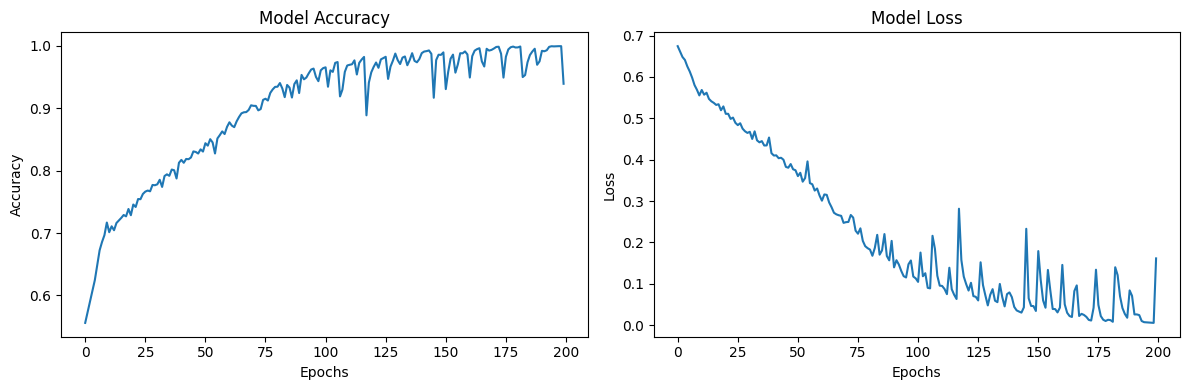

In [26]:
from model import accuracy_loss_plot
accuracy_loss_plot(history)

In [23]:
data = np.load("ml_processed/chb01_03.edf_data.npy")
labels = np.load("ml_processed/chb01_03.edf_labels.npy")
# for i in range(0, len(labels)):
#     if labels[i][0] == 1:
#         print(i)
# print(data.shape)
known_seizures = data[3000:3020]
# print(known_seizures.shape)
known_seizure_label = labels[3000:3020]
for label in known_seizure_label:
    if label == 0:
        print("OOPS")

seizure_guesses = []
for known_seizure in known_seizures:
    # print(known_seizure.shape)
    reshaped = np.reshape(known_seizure, (-1, 23, 256))
    guess = model.predict(reshaped)
    if guess[0][0][0] > 0.4:
        seizure_guesses.append((guess[0][0][0], 1))
    else:
        seizure_guesses.append((guess[0][0][0], 0))

known_normal = data[0:20]
# print(known_seizures.shape)
known_normal_label = labels[0:20]
for label in known_normal_label:
    if label == 1:
        print("OOPS")


normal_guesses = []
for known_normal in known_normal:
    # print(known_seizure.shape)
    reshaped = np.reshape(known_normal, (-1, 23, 256))
    guess = model.predict(reshaped)
    if guess > 0.4:
        normal_guesses.append((guess[0][0][0], 1))
    else:
        normal_guesses.append((guess[0][0][0], 0))

1/1 [==============================] - 0s 19ms/step


In [24]:
print(seizure_guesses)
print(normal_guesses)

[(0.9998223, 1), (0.98837286, 1), (0.99999976, 1), (1.0, 1), (0.9999999, 1), (1.0, 1), (1.0, 1), (0.99999857, 1), (0.99990976, 1), (0.9999981, 1), (0.94408494, 1), (0.99436295, 1), (0.99985254, 1), (0.99954224, 1), (0.9995763, 1), (0.97674805, 1), (0.9973456, 1), (0.957145, 1), (0.9521755, 1), (0.9920449, 1)]
[(0.010562617, 0), (8.228935e-05, 0), (0.0007855304, 0), (0.002910877, 0), (0.011378292, 0), (0.00038925454, 0), (0.00078868883, 0), (7.048134e-05, 0), (0.0050894283, 0), (8.4524014e-05, 0), (0.005422351, 0), (0.001907397, 0), (2.9307626e-05, 0), (0.0046655564, 0), (0.011017394, 0), (0.031139646, 0), (0.0009212238, 0), (0.00039861395, 0), (0.003766115, 0), (9.1100745e-05, 0)]


had to drop chb12-27, the sensors changed and they are different from everything else.

In [25]:
# from data import generate_balanced_train_data
# import os
# cases = [x for x in os.listdir("dataset/chb-mit-scalp-eeg-database-1.0.0/") if "chb" in x]
# generate_balanced_train_data(256,256,cases)